In [427]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

from sklearn.ensemble import GradientBoostingRegressor
import seaborn as sns
import matplotlib.pyplot as plt

import pickle

# Part 4 - Regression Model

In [297]:
dataset_final = pd.read_csv('acetylcholinesterase_06_entamoeba_bioactivity_data_3class_pIC50_pubchem_fp.csv')

In [298]:
def dataSplit(data):
    training_data, testing_data = train_test_split(data, test_size= 0.2, random_state= 42)

    # export training and test to csv
    # training_data.to_csv('training_data.csv', index=False)
    # testing_data.to_csv('testing_data.csv', index=False)

    return training_data,testing_data

training_data, testing_data = dataSplit(dataset_final)

In [426]:
training_data

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,8.89
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.10
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.41
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.52
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
888,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.30
889,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.90
890,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.30
891,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.60


In [303]:
# training_data.reset_index(inplace=True)
# testing_data.reset_index(inplace=True)

training_data.drop(columns='index', inplace=True)
testing_data.drop(columns='index', inplace=True)

In [307]:
# read data training
# dataset_final = pd.read_csv('acetylcholinesterase_06_entamoeba_bioactivity_data_3class_pIC50_pubchem_fp.csv')

# Separate the X and y of data train
X_train = training_data.drop(columns = "pIC50")
y_train = training_data["pIC50"]

In [306]:
# read data testing
# data_testing_final = pd.read_csv('testing_acetylcholinesterase_06_entamoeba_bioactivity_data_3class_pIC50_pubchem_fp.csv')

# Separate the X and y of data test
X_test = testing_data.drop(columns = "pIC50")
y_test = testing_data['pIC50']

# Remove low variance

In [379]:
# Remove low variance features
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X = selection.fit(X_train)

# transform data
train_clean = X.transform(X_train)
test_clean = X.transform(X_test)

# to Dataframe
X_train_clean = pd.DataFrame(train_clean)
X_test_clean = pd.DataFrame(test_clean)

In [424]:
X_train_clean

,0,1,2,3,4,5,6,7,8,9,...,165,166,167,168,169,170,171,172,173,174
0,1,1,1,0,1,0,1,1,1,1,...,1,1,1,1,1,1,0,1,1,0
1,1,1,1,1,0,0,1,1,1,1,...,1,1,1,1,0,0,0,0,0,0
2,1,1,1,1,1,0,0,0,0,0,...,1,1,1,0,1,0,0,1,0,0
3,1,1,1,0,1,0,1,1,1,0,...,1,1,1,0,1,1,0,1,1,0
4,1,1,1,1,0,0,1,1,1,1,...,1,1,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
888,1,1,0,0,1,1,1,0,1,0,...,1,1,1,1,1,1,1,1,1,1
889,1,0,1,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
890,0,0,1,1,1,0,1,1,1,1,...,1,1,1,0,0,0,0,0,0,0
891,0,0,1,1,1,0,1,1,1,0,...,1,1,1,0,0,0,0,0,0,0


# Data splitting

In [266]:
def dataSplit(data):
    training_data, testing_data = train_test_split(data, test_size= 0.2, random_state= 42)

    # export training and test to csv
    # training_data.to_csv('training_data.csv', index=False)
    # testing_data.to_csv('testing_data.csv', index=False)

    return training_data,testing_data

training_data, testing_data = dataSplit(X_clean)

In [268]:
X_train_clean = training_data.drop(columns = 170)
y_train = training_data[170]

X_test_clean = testing_data.drop(columns = 170)
y_test = testing_data[170]

In [398]:
X_train_clean

,0,1,2,3,4,5,6,7,8,9,...,165,166,167,168,169,170,171,172,173,174
0,1,1,1,0,1,0,1,1,1,1,...,1,1,1,1,1,1,0,1,1,0
1,1,1,1,1,0,0,1,1,1,1,...,1,1,1,1,0,0,0,0,0,0
2,1,1,1,1,1,0,0,0,0,0,...,1,1,1,0,1,0,0,1,0,0
3,1,1,1,0,1,0,1,1,1,0,...,1,1,1,0,1,1,0,1,1,0
4,1,1,1,1,0,0,1,1,1,1,...,1,1,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
888,1,1,0,0,1,1,1,0,1,0,...,1,1,1,1,1,1,1,1,1,1
889,1,0,1,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
890,0,0,1,1,1,0,1,1,1,1,...,1,1,1,0,0,0,0,0,0,0
891,0,0,1,1,1,0,1,1,1,0,...,1,1,1,0,0,0,0,0,0,0


In [395]:
X_train_clean.to_csv('descriptor_list.csv', index=False)

In [396]:
training_data

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,8.89
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.10
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.41
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.52
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
888,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.30
889,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.90
890,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.30
891,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.60


# Baseline Model

In [380]:
baseline_pred = y_train.mean()
baseline_pred

5.427723663627513

In [321]:
from sklearn.metrics import mean_squared_error

baseline_mse = mean_squared_error(y_train, np.ones(len(y_train)) * baseline_pred)
print(baseline_mse)

2.7390799838117785


In [325]:
params = {"n_estimators": [10, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500],
          "max_features": ["sqrt", "log2"]}

## CatBoost

In [381]:
from catboost import CatBoostRegressor

# Make catboost
grid_cat = CatBoostRegressor(iterations = 25,
                            learning_rate= 1,
                            depth= 10)

grid_cat.fit(X_train_clean, y_train)

# Get predictions
y_pred_cat = grid_cat.predict(X_train_clean)
y_pred_test_cat = grid_cat.predict(X_test_clean)

# MSE Train Data
mse_train_cat = mean_squared_error(y_train, y_pred_cat)
mse_test_cat = mean_squared_error(y_test, y_pred_test_cat)

# RMSE Train Data
RMSE_cat = np.sqrt(mse_train_cat)
RMSE_test_cat = np.sqrt(mse_test_cat)

# R2 
r2_train_cat = r2_score(y_train, y_pred_cat)
r2_test_cat = r2_score(y_test, y_pred_test_cat)

print(f'MSE Train: {mse_train_cat:.4f} Test: {mse_test_cat:.4f}')
print(f'RMSE Train: {RMSE_cat:.4f} Test: {RMSE_test_cat:.4f}')
print(f'R2 Train: {r2_train_cat:.4f} Test: {r2_test_cat:.4f}')

0:	learn: 1.1373847	total: 39.3ms	remaining: 943ms
1:	learn: 0.9779083	total: 81.4ms	remaining: 937ms
2:	learn: 0.9095999	total: 109ms	remaining: 798ms
3:	learn: 0.8658665	total: 137ms	remaining: 719ms
4:	learn: 0.8273755	total: 164ms	remaining: 656ms
5:	learn: 0.8068480	total: 193ms	remaining: 612ms
6:	learn: 0.7803389	total: 222ms	remaining: 572ms
7:	learn: 0.7456937	total: 251ms	remaining: 533ms
8:	learn: 0.7207955	total: 280ms	remaining: 498ms
9:	learn: 0.7086931	total: 309ms	remaining: 464ms
10:	learn: 0.6911972	total: 337ms	remaining: 429ms
11:	learn: 0.6802292	total: 365ms	remaining: 395ms
12:	learn: 0.6661964	total: 392ms	remaining: 362ms
13:	learn: 0.6564242	total: 423ms	remaining: 333ms
14:	learn: 0.6476309	total: 452ms	remaining: 301ms
15:	learn: 0.6400145	total: 480ms	remaining: 270ms
16:	learn: 0.6355402	total: 508ms	remaining: 239ms
17:	learn: 0.6266516	total: 537ms	remaining: 209ms
18:	learn: 0.6223624	total: 567ms	remaining: 179ms
19:	learn: 0.6177790	total: 597ms	remai

# Random Forest Regressor

In [382]:
# Build gridsearch
rf_tree = RandomForestRegressor(criterion = "squared_error",
                                random_state = 123)

rf_tree_cv = GridSearchCV(estimator = rf_tree,
                          param_grid = params,
                          cv = 5,
                          scoring = "neg_mean_squared_error")

# Fit grid search cv
rf_tree_cv.fit(X_train_clean, y_train)

# Best params
rf_tree_cv.best_params_

# Refit the Random Forest
rf_tree = RandomForestRegressor(criterion = "squared_error",
                                max_features = rf_tree_cv.best_params_["max_features"],
                                n_estimators = rf_tree_cv.best_params_["n_estimators"],
                                random_state = 123)

rf_tree.fit(X_train_clean, y_train)

# Predict
y_pred_train_rf = rf_tree.predict(X_train_clean)
y_pred_test_rf = rf_tree.predict(X_test_clean)

# MSE
mse_train_rf = mean_squared_error(y_train, y_pred_train_rf)
mse_test_rf = mean_squared_error(y_test, y_pred_test_rf)

# RMSE Train Data
RMSE_rf = np.sqrt(mse_train_rf)
RMSE_test_rf = np.sqrt(mse_test_rf)

# R2 
r2_train_rf = r2_score(y_train, y_pred_train_rf)
r2_test_rf = r2_score(y_test, y_pred_test_rf)

print(f'MSE train: {mse_train_rf:.4f} test: {mse_test_rf:.4f}')
print(f'RMSE train: {RMSE_rf:.4f} test: {RMSE_test_rf:.4f}')
print(f'R2 train: {r2_train_rf:.4f} test: {r2_test_rf:.4f}')

MSE train: 0.4420 test: 0.9949
RMSE train: 0.6648 test: 0.9974
R2 train: 0.8386 test: 0.5651


# Gradient Boosting Method

In [373]:
# Build Gradient Boost
# grad_tree = GradientBoostingRegressor(max_features = 'log2', 
#                                       n_estimators = 400,
#                                       random_state = 123)

# grad_tree.fit(X_train_clean, y_train)

grad_tree = GradientBoostingRegressor(criterion = "squared_error",
                                random_state = 123)

gd_boost_cv = GridSearchCV(estimator = grad_tree,
                          param_grid = params,
                          cv = 5,
                          scoring = "neg_mean_squared_error")

# Fit grid search cv
gd_boost_cv.fit(X_train_clean, y_train)

# Best params
gd_boost_cv.best_params_

# Refit the Random Forest
grad_tree = RandomForestRegressor(criterion = "squared_error",
                                max_features = gd_boost_cv.best_params_["max_features"],
                                n_estimators = gd_boost_cv.best_params_["n_estimators"],
                                random_state = 123)

grad_tree.fit(X_train_clean, y_train)

# Predict
y_pred_train_gt = grad_tree.predict(X_train_clean)
y_pred_test_gt = grad_tree.predict(X_test_clean)

# MSE
mse_train_gt = mean_squared_error(y_train, y_pred_train_gt)
mse_test_gt = mean_squared_error(y_test, y_pred_test_gt)

# RMSE Train Data
RMSE_gt = np.sqrt(mse_train_gt)
RMSE_test_gt = np.sqrt(mse_test_gt)

# R2 
r2_train_gt = r2_score(y_train, y_pred_train_gt)
r2_test_gt = r2_score(y_test, y_pred_test_gt)

print(f'MSE train: {mse_train_gt:.4f} test: {mse_test_gt:.4f}')
print(f'RMSE train: {RMSE_gt:.4f} test: {RMSE_test_gt:.4f}')
print(f'R2 train: {r2_train_gt:.4f} test: {r2_test_gt:.4f}')

MSE train: 0.4415 test: 0.9874
RMSE train: 0.6645 test: 0.9937
R2 train: 0.8388 test: 0.5684


In [318]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score

# gradient boosted trees tend to do well on problems like this
reg = GradientBoostingRegressor(n_estimators=50, random_state=0)

from skopt.space import Real, Integer
from skopt.utils import use_named_args


# The list of hyper-parameters we want to optimize. For each one we define the
# bounds, the corresponding scikit-learn parameter name, as well as how to
# sample values from that dimension (`'log-uniform'` for the learning rate)
space  = [Integer(1, 5, name='max_depth'),
          Real(10**-5, 10**0, "log-uniform", name='learning_rate'),
          Integer(1, X_train_clean.shape[1], name='max_features'),
          Integer(2, 100, name='min_samples_split'),
          Integer(1, 100, name='min_samples_leaf')]

# this decorator allows your objective function to receive a the parameters as
# keyword arguments. This is particularly convenient when you want to set
# scikit-learn estimator parameters
@use_named_args(space)
def objective(**params):
    reg.set_params(**params)

    return -np.mean(cross_val_score(reg, X_train_clean, y_train, cv=5, n_jobs=-1,
                                    scoring="neg_mean_absolute_error"))

from skopt import gp_minimize
res_gp = gp_minimize(objective, space, n_calls=50, random_state=0)

"Best score=%.4f" % res_gp.fun

'Best score=0.7323'

# Conclusion

In [376]:
print('Models comparison\n')

print(f'Baseline model: {baseline_pred}\n')

print(f'CatBoost MSE Train: {mse_train_cat:.4f} - Test: {mse_test_cat:.4f}')
print(f'CatBoost RMSE Train: {RMSE_cat:.4f} - Test: {RMSE_test_cat:.4f}')
print(f'CatBoost R2 Train: {r2_train_cat:.4f} - Test: {r2_test_cat:.4f}\n')

print(f'ForestRegressor MSE train: {mse_train_rf:.4f} - Test: {mse_test_rf:.4f}')
print(f'ForestRegressor RMSE train: {RMSE_rf:.4f} - Test: {RMSE_test_rf:.4f}')
print(f'ForestRegressor R2 train: {r2_train_rf:.4f} - Test: {r2_test_rf:.4f}\n')

print(f'GradientBoost MSE train: {mse_train_gt:.4f} test: {mse_test_gt:.4f}')
print(f'GradientBoost RMSE train: {RMSE_gt:.4f} test: {RMSE_test_gt:.4f}')
print(f'GradientBoost R2 train: {r2_train_gt:.4f} test: {r2_test_gt:.4f}\n')

Models comparison

Baseline model: 5.427723663627513

CatBoost MSE Train: 0.3691 - Test: 1.2805
CatBoost RMSE Train: 0.6075 - Test: 1.1316
CatBoost R2 Train: 0.8653 - Test: 0.4403

ForestRegressor MSE train: 0.4420 - Test: 0.9949
ForestRegressor RMSE train: 0.6648 - Test: 0.9974
ForestRegressor R2 train: 0.8386 - Test: 0.5651

GradientBoost MSE train: 0.4415 test: 0.9874
GradientBoost RMSE train: 0.6645 test: 0.9937
GradientBoost R2 train: 0.8388 test: 0.5684



<function matplotlib.pyplot.show(close=None, block=None)>

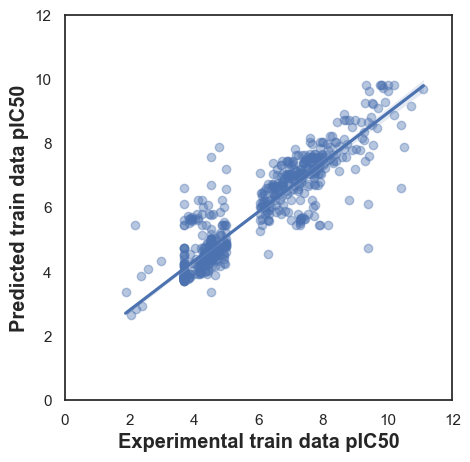

In [422]:
sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(x = y_train, y= y_pred_train_gt, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental train data pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted train data pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

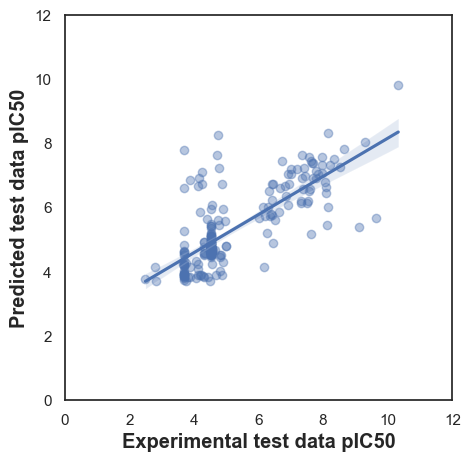

In [423]:
sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(x = y_test, y= y_pred_test_gt, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental test data pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted test data pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show

# Pickle

In [378]:
with open('trained_model-0.1.0.pkl', 'wb') as f:
    pickle.dump(grad_tree, f)